In [219]:
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from PIL import Image

from keras.utils.np_utils import to_categorical



Populating the interactive namespace from numpy and matplotlib


In [210]:
train_data = pd.read_csv("train.csv")

In [211]:
train_data.drop(['id'], axis = 1, inplace = True)

Y = train_data.pop('species')
labels = LabelEncoder().fit(Y)
Y = labels.transform(Y)
Y_hot = to_categorical(Y)

In [ ]:
iso = Isomap(n_neighbors=5, n_components=3)
iso.fit(X_norm)
train_iso = iso.transform(train_data)

%pylab qt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_iso[:,0],train_iso[:,1],train_iso[:,2], marker='.', c =Y,cmap = 'spectral', alpha=0.9)


In [ ]:
iso = PCA(n_components=3)
iso.fit(X_norm)
train_iso = iso.transform(train_data)

%pylab qt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_iso[:,0],train_iso[:,1],train_iso[:,2], marker='.', c =Y,cmap = 'spectral', alpha=0.9)


In [5]:
from sklearn.preprocessing import normalize, scale, StandardScaler

In [262]:
X_train, X_test, y_train, y_test = train_test_split(train_data, Y_hot, test_size = 0.3, random_state = 4)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print X_train.shape, X_test.shape, y_train.shape, y_test.shape,train_data.shape, Y_hot.shape


(693, 192) (297, 192) (693, 99) (297, 99) (990, 192) (990, 99)


In [29]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Merge
from keras.optimizers import RMSprop

In [268]:
model = Sequential()
model.add(Dense(99, input_dim = 192, bias=True, activation = 'softmax', b_regularizer='l1l2'))
#model.add(Dropout(0.2))

In [269]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])

In [286]:
training = model.fit(X_train, y_train, batch_size = 64, nb_epoch=100, verbose=0)

In [287]:
print model.evaluate(X_train, y_train)
print model.evaluate(X_test, y_test)

693/693 [==============================] - 0s     
[1.2884238357053915e-07, 1.0]
297/297 [==============================] - 0s     
[0.073524256039297936, 0.97643097663166545]


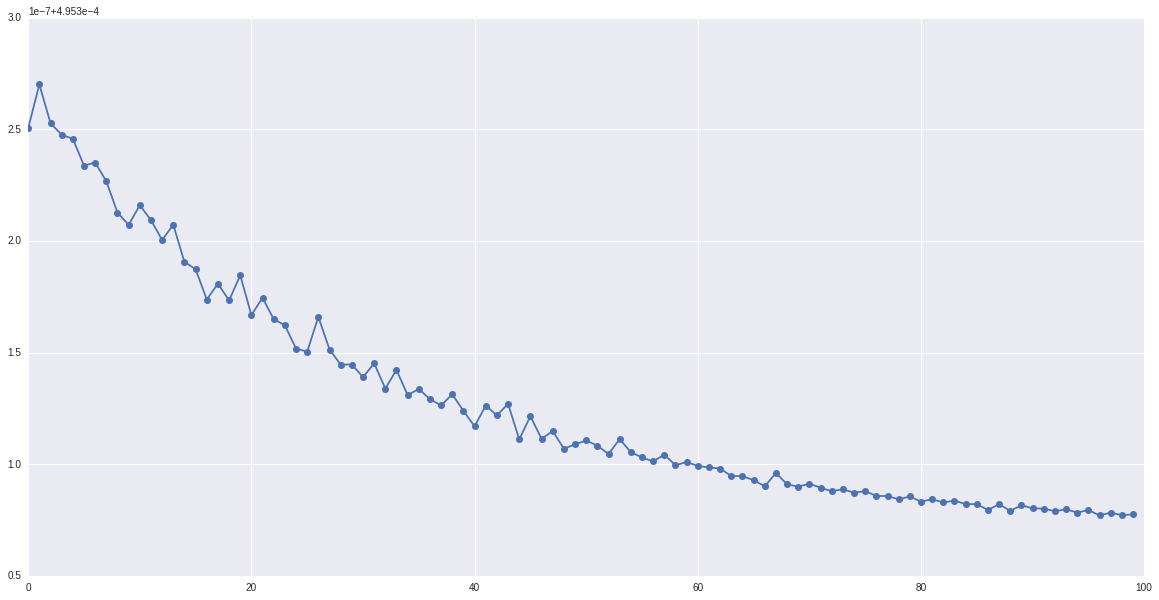

In [288]:
plt.figure(figsize = (20,10))
plt.plot(training.history['loss'], 'o-')
# plt.plot(training.history['acc'], 'o-', color = 'r')


In [88]:
test = pd.read_csv('test.csv')
test_ids = test.pop('id')
x_test = test.values
x_test = scaler.transform(x_test)
y_test = model.predict_proba(x_test)

submission = pd.DataFrame(y_test, index=test_ids, columns=labels.classes_)
# model.fit([X_margin_train, X_shape_train, X_texture_train], Y_train, nb_epoch=100, batch_size=1, verbose=1)
submission.to_csv('submission_nn.csv')

594/594 [==============================] - 0s     


In [291]:
ypred = model.predict_classes(X_test)

297/297 [==============================] - 0s     


In [292]:
for ind, val in enumerate(np.argmax(y_test,axis = 1) - ypred):
    if val!=0:
        print ind, val

52 21
100 1
120 -66
155 -79
164 9
241 2
296 1
